In [458]:
# import libraries 

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use("ggplot") 
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)  # to adjust the configuration of the plot we will create 

In [615]:
# read in the data 
df = pd.read_csv(r'C:\Users\USER\Downloads\archive (10)\movies.csv')

# lets look at the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [567]:
#data types for our columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [617]:
# filling missing values and changing data types 

df["budget"] = df["budget"].fillna(0)
df["gross"] = df["gross"].fillna(0)
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["released"] = df["released"].fillna("Not Known")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [571]:
# check for missing values 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} . {}%'.format (col,pct_missing))

name . 0.0%
rating . 0.010041731872717789%
genre . 0.0%
year . 0.0%
released . 0.0%
score . 0.0003912363067292645%
votes . 0.0003912363067292645%
director . 0.0%
writer . 0.0003912363067292645%
star . 0.00013041210224308815%
country . 0.0003912363067292645%
budget . 0.0%
gross . 0.0%
company . 0.002217005738132499%
runtime . 0.0005216484089723526%


In [619]:
#spliting columns 
df[["released year", "country"]] = df["released"].str.split(", ", expand = True)
df.drop(columns = "released")
df["year corrected"] = df["country"].str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,1980 (United States),19000000,46998772,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,1980 (United States),4500000,58853106,Columbia Pictures,104.0,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,1980 (United States),18000000,538375067,Lucasfilm,124.0,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,1980 (United States),3500000,83453539,Paramount Pictures,88.0,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,1980 (United States),6000000,39846344,Orion Pictures,98.0,July 25,1980


In [621]:

# Extracting country names using regex
df['country'] = df['country'].str.extract(r'\((.*?)\)')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980


In [623]:
import re
from datetime import datetime

# Function to clean and reformat dates
def clean_date(date_str):
    date_match = re.search(r'([A-Za-z]+ \d{1,2}, \d{4})', date_str)
    if date_match:
        extracted_date = date_match.group(1)
        return datetime.strptime(extracted_date, "%B %d, %Y").strftime("%Y-%m-%d")
    return None  # Handle cases where date isn't found

# Apply function
df['released'] = df['released'].apply(clean_date)

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year corrected
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980


In [625]:
#sort values

df = df.sort_values(by = "gross", ascending = False, inplace = False )


In [627]:
# drop any duplicates 

df.drop_duplicates().head()

# drop table 
df = df.drop(columns = ["released year"])

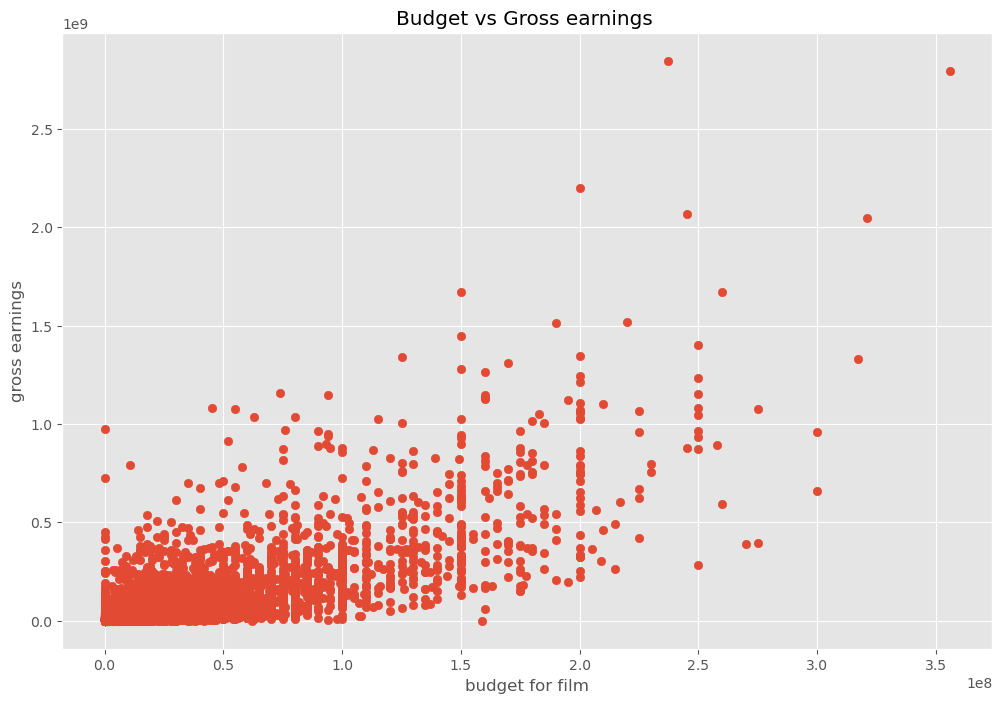

In [442]:
# scattered plot with budget vs gross 

plt.scatter(x = df["budget"], y = df["gross"])
plt.title("Budget vs Gross earnings ")
plt.xlabel("budget for film")
plt.ylabel("gross earnings")
plt.show()

In [561]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


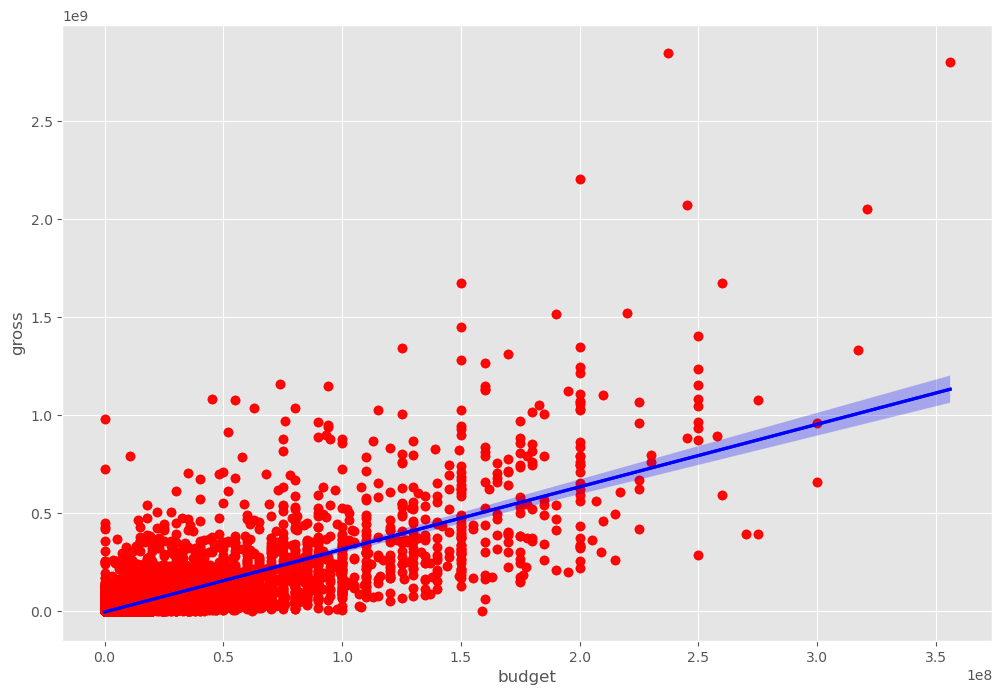

In [454]:
# plot budget vs gross using seaborn 

sns.regplot(x = "budget", y = "gross", data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"} )
plt.show()

In [500]:
# lets start loking at correlation 

df.corr(numeric_only= True)
# there is a high correlation between gross and budget 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


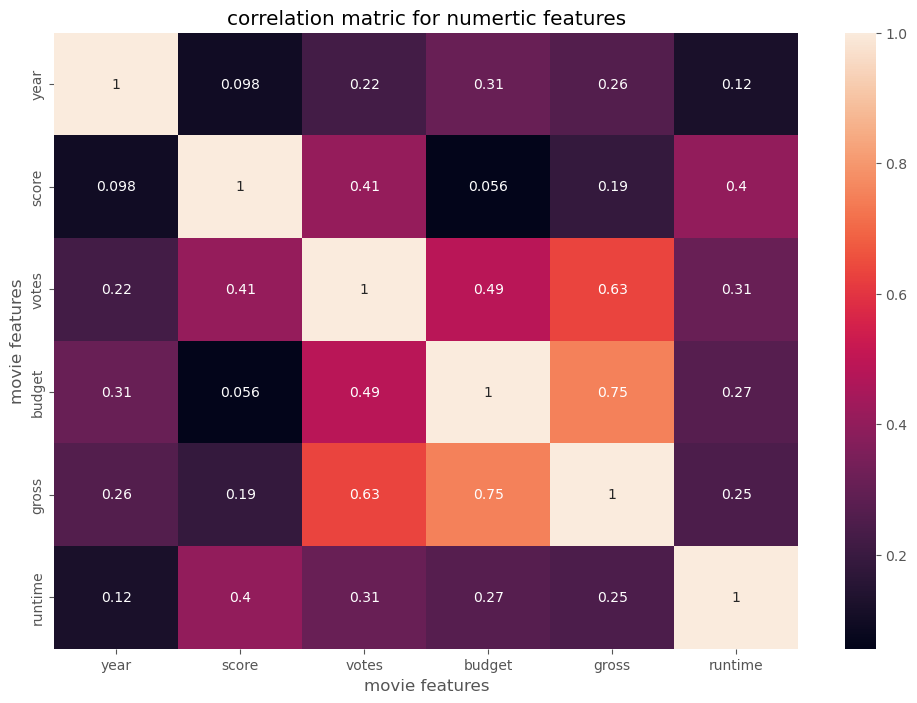

In [450]:
correlation_matrix = df.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("correlation matric for numertic features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [589]:
# look at company 

df_numerized = df 
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtypes == "object"): 
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
5445,533,5,0,2009,2071,7.8,1100000.0,1155,1778,2334,56,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,2827,8.4,903000.0,162,743,2241,56,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,1188,7.8,1100000.0,1155,1778,1595,56,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,2571,7.8,876000.0,1125,2550,524,56,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,2742,8.4,897000.0,162,743,2241,56,321000000,2048359754,1606,149.0,38


In [629]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


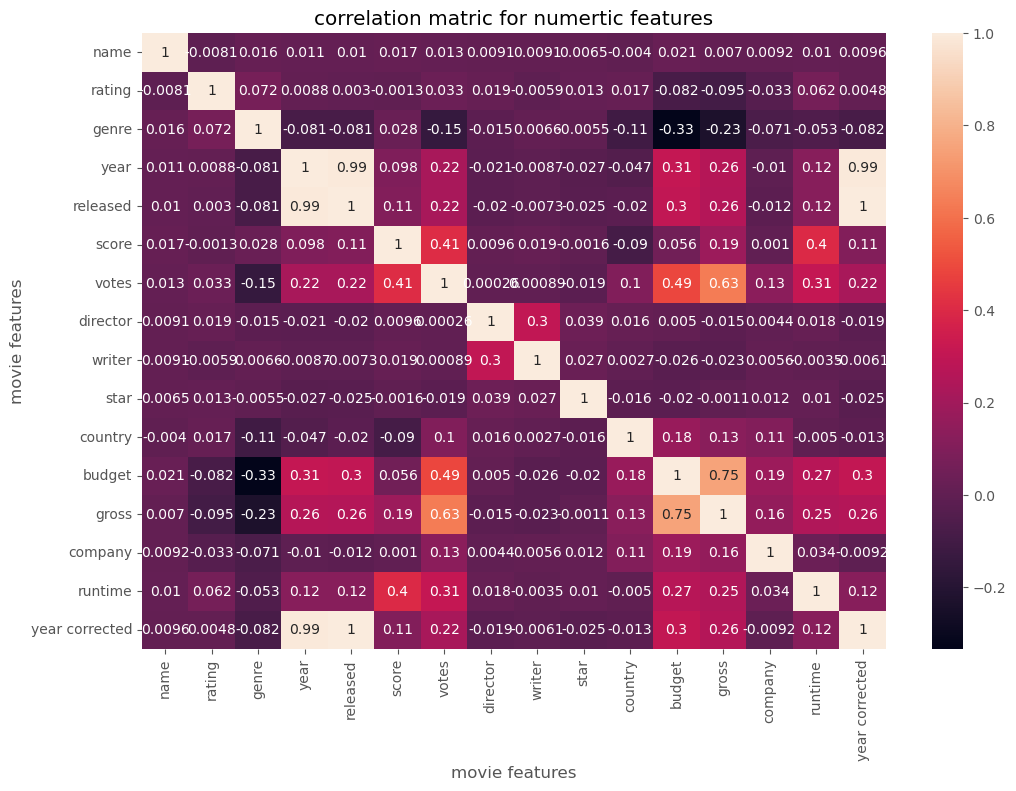

In [585]:
correlation_matrix = df_numerized.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("correlation matric for numertic features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [587]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
name,1.000000,-0.008069,0.016355,0.011453,0.010492,0.017097,0.013088,0.009079,0.009081,0.006472,-0.004039,0.020548,0.006989,0.009211,0.010392,0.009553
rating,-0.008069,1.000000,0.072423,0.008779,0.003042,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.016953,-0.081939,-0.095450,-0.032943,0.062145,0.004829
genre,0.016355,0.072423,1.000000,-0.081261,-0.080838,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.106374,-0.334021,-0.234297,-0.071067,-0.052711,-0.082070
year,0.011453,0.008779,-0.081261,1.000000,0.992979,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.046631,0.309212,0.261900,-0.010431,0.120811,0.992136
released,0.010492,0.003042,-0.080838,0.992979,1.000000,0.106901,0.219335,-0.019843,-0.007283,-0.025442,-0.019769,0.301591,0.258191,-0.011595,0.123989,0.999102
score,0.017097,-0.001314,0.027965,0.097995,0.106901,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.089669,0.055665,0.186392,0.001030,0.399451,0.105341
votes,0.013088,0.033225,-0.145307,0.222945,0.219335,0.409182,1.000000,0.000260,0.000892,-0.019282,0.101995,0.486862,0.632834,0.133204,0.309212,0.219954
director,0.009079,0.019483,-0.015258,-0.020795,-0.019843,0.009559,0.000260,1.000000,0.299067,0.039234,0.016186,0.004976,-0.014916,0.004404,0.017624,-0.018620
writer,0.009081,-0.005921,0.006567,-0.008656,-0.007283,0.019416,0.000892,0.299067,1.000000,0.027245,0.002692,-0.025911,-0.022997,0.005646,-0.003511,-0.006134
star,0.006472,0.013405,-0.005477,-0.027242,-0.025442,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.015670,-0.019952,-0.001129,0.012442,0.010174,-0.025288


In [591]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released          0.010492
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.004039
                budget            0.020548
                gross             0.006989
                company           0.009211
                runtime           0.010392
                year corrected    0.009553
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.003042
                score            -0.001314
                votes             0.033225
           

In [593]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.334021
budget          genre            -0.334021
genre           gross            -0.234297
gross           genre            -0.234297
genre           votes            -0.145307
votes           genre            -0.145307
country         genre            -0.106374
genre           country          -0.106374
rating          gross            -0.095450
gross           rating           -0.095450
score           country          -0.089669
country         score            -0.089669
genre           year corrected   -0.082070
year corrected  genre            -0.082070
rating          budget           -0.081939
budget          rating           -0.081939
genre           year             -0.081261
year            genre            -0.081261
released        genre            -0.080838
genre           released         -0.080838
                company          -0.071067
company         genre            -0.071067
runtime         genre            -0.052711
genre      

In [611]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           gross             0.632834
gross           votes             0.632834
                budget            0.750157
budget          gross             0.750157
year corrected  year              0.992136
year            year corrected    0.992136
released        year              0.992979
year            released          0.992979
year corrected  released          0.999102
released        year corrected    0.999102
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating     

In [ ]:
# company has moderate positive correlation